In [44]:
# 분기별
# 상반기/하반기 별
# hs4 대분류 중분류 나눠서 보기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['font.family'] = 'Malgun Gothic'   # 윈도우: 맑은 고딕
plt.rcParams['axes.unicode_minus'] = False      # 마이너스 기호 깨짐 방지
sns.set(font='Malgun Gothic', style='whitegrid')  # seaborn에도 적용

In [3]:
df = pd.read_csv('F:/데이콘/국민대학교_AI빅데이터_분석_경진대회/data/train.csv', encoding='utf-8')
df.head()

,item_id,year,month,seq,type,hs4,weight,quantity,value
0,DEWLVASR,2022,1,1.0,1,3038,14858.0,0.0,32688.0
1,ELQGMQWE,2022,1,1.0,1,2002,62195.0,0.0,110617.0
2,AHMDUILJ,2022,1,1.0,1,2102,18426.0,0.0,72766.0
3,XIPPENFQ,2022,1,1.0,1,2501,20426.0,0.0,11172.0
4,FTSVTTSR,2022,1,1.0,1,2529,248000.0,0.0,143004.0


In [4]:
sub_sample = pd.read_csv('F:/데이콘/국민대학교_AI빅데이터_분석_경진대회/data/sample_submission.csv', encoding='utf-8')
sub_sample.head()

,leading_item_id,following_item_id,value
0,DEWLVASR,ELQGMQWE,999999999
1,DEWLVASR,AHMDUILJ,999999999
2,DEWLVASR,XIPPENFQ,999999999
3,DEWLVASR,FTSVTTSR,999999999
4,DEWLVASR,XMKRPGLB,999999999


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10836 entries, 0 to 10835
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   item_id   10836 non-null  object 
 1   year      10836 non-null  int64  
 2   month     10836 non-null  int64  
 3   seq       10836 non-null  float64
 4   type      10836 non-null  int64  
 5   hs4       10836 non-null  int64  
 6   weight    10836 non-null  float64
 7   quantity  10836 non-null  float64
 8   value     10836 non-null  float64
dtypes: float64(4), int64(4), object(1)
memory usage: 762.0+ KB


In [6]:
df.describe() # 표준화, 정규화

,year,month,seq,type,hs4,weight,quantity,value
count,10836.000000,10836.000000,10836.000000,10836.0,10836.000000,1.083600e+04,1.083600e+04,1.083600e+04
mean,2023.331395,6.108435,2.034238,1.0,4821.969546,1.098413e+06,8.633771e+04,1.739442e+06
std,1.049357,3.392649,0.813380,0.0,2296.892536,5.153790e+06,7.614669e+06,5.457480e+06
min,2022.000000,1.000000,1.000000,1.0,1210.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,2022.000000,3.000000,1.000000,1.0,2833.000000,3.457500e+02,0.000000e+00,1.150675e+04
50%,2023.000000,6.000000,2.000000,1.0,3824.000000,6.532500e+03,0.000000e+00,1.250070e+05
75%,2024.000000,9.000000,3.000000,1.0,7202.000000,1.555108e+05,0.000000e+00,1.039764e+06
max,2025.000000,12.000000,3.000000,1.0,9403.000000,1.104919e+08,7.925990e+08,1.110414e+08


### 1. 기본 구조 및 이상치 탐색

In [7]:
def basic_eda(column):
    if column in ['item_id', 'hs4']:
        print(len(df[column].unique()))
        print('-'*50)
        print(df[column].unique())
        print('-'*50)
        print(df[column].value_counts())
    else:
        print(df[column].unique())
        print('-'*50)
        print(df[column].value_counts())

In [8]:
# item_id
basic_eda('item_id') # 불균형한 데이터

100
--------------------------------------------------
['DEWLVASR' 'ELQGMQWE' 'AHMDUILJ' 'XIPPENFQ' 'FTSVTTSR' 'XMKRPGLB'
 'RCBZUSIM' 'SUOYXCHP' 'ZKENOUDA' 'WQMVCOEM' 'BSRMSVTC' 'DDEXPPXU'
 'LLHREMKS' 'DNMPSKTB' 'WPQXWHYO' 'VWMBASNE' 'RJGPVEXX' 'ATLDMDBO'
 'SAHWCZNH' 'LUENUFGA' 'HXYSSRXE' 'QRKRBYJL' 'FRHNWLNI' 'MBSBZBXA'
 'BJALXPFS' 'RAWUKQMJ' 'ZGJXVMNI' 'LRVGFDFM' 'BTMOEMEP' 'UXSPKBJR'
 'BEZYMBBT' 'SAAYMURU' 'QJQJSWFU' 'EVBVXETX' 'DUCMGGNW' 'OJIFIHMZ'
 'STZDBITS' 'SNHYOVBM' 'LPHPPJUG' 'FCYBOAXC' 'JPBRUTWP' 'LTOYKIML'
 'QVLMOEYE' 'JERHKLYW' 'ZXERAXWP' 'LSOIUSXD' 'XUOIQPFL' 'WBLJNPZQ'
 'OXKURKXR' 'AXULOHBQ' 'DBWLZWNK' 'NZKBIBNU' 'OKMBFVKS' 'VUAFAIYJ'
 'CCLHWFWF' 'OGAFEHLU' 'SDWAYPIK' 'UIFPPCLR' 'KEUWZRKO' 'FQCLOEXA'
 'APQGTRMF' 'ZCELVYQU' 'KAGJCHMR' 'KJNSOAHR' 'QKXNTIIB' 'GKQIJYDH'
 'VBYCLTYZ' 'GYHKIVQT' 'ROACSLMG' 'VMAQSTJE' 'XIFHSOWQ' 'FITUEHWN'
 'UGEQLMXM' 'BUZIIBYG' 'JBVHSUWY' 'NAQIHUKZ' 'MIRCVAMV' 'AANGBULD'
 'WHPUAOID' 'UQYUIVVR' 'FWUCPMMW' 'IGDVVKUD' 'FDXPMYGF' 'QSDCUCLB'
 'YSYHG

In [9]:
# year
basic_eda('year')

[2022 2023 2024 2025]
--------------------------------------------------
year
2024    3043
2023    3028
2022    2994
2025    1771
Name: count, dtype: int64


In [10]:
# month
basic_eda('month') # 3,4분기 거래 저조

[ 1  2  3  4  5  6  7  8  9 10 11 12]
--------------------------------------------------
month
7     1033
2     1022
4     1008
5     1004
6     1000
3      997
1      991
12     777
11     761
9      757
8      743
10     743
Name: count, dtype: int64


In [11]:
# seq
basic_eda('seq') # sum

[1. 2. 3.]
--------------------------------------------------
seq
3.0    3776
2.0    3655
1.0    3405
Name: count, dtype: int64


In [12]:
# type
basic_eda('type') # 필요없는 열

[1]
--------------------------------------------------
type
1    10836
Name: count, dtype: int64


In [13]:
# hs4
basic_eda('hs4') # 대분류, 중분류 -> EDA # 불균형함 # item_id와 매핑이 될 확률 높음

71
--------------------------------------------------
[3038 2002 2102 2501 2529 2805 2807 2811 2814 2825 2833 2836 2841 2846
 2847 2916 3006 3102 3206 3207 3215 3307 3404 3806 3815 3824 3904 3909
 4202 4601 4802 5111 5205 5309 5402 5515 5602 5609 5705 6101 6211 7202
 7207 8102 8105 8461 8467 8479 8501 8505 8527 8708 8714 9403 1210 3813
 4408 4810 5512 2701 7907 2710 6006 5119 9022 4403 3003 2612 4302 7142
 3024]
--------------------------------------------------
hs4
2805    646
3824    535
2811    516
8501    423
8505    387
       ... 
4302      9
7142      8
2612      6
3024      5
3003      2
Name: count, Length: 71, dtype: int64


In [14]:
def outlier_eda(column):
    print(f'음수 개수: {df[column][df[column] < 0].sum()}')
    print('-'*50)
    print(df[column].describe())

In [15]:
# weight
outlier_eda('weight')

음수 개수: 0.0
--------------------------------------------------
count    1.083600e+04
mean     1.098413e+06
std      5.153790e+06
min      0.000000e+00
25%      3.457500e+02
50%      6.532500e+03
75%      1.555108e+05
max      1.104919e+08
Name: weight, dtype: float64


In [16]:
# quantity
outlier_eda('quantity')

음수 개수: 0.0
--------------------------------------------------
count    1.083600e+04
mean     8.633771e+04
std      7.614669e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      7.925990e+08
Name: quantity, dtype: float64


In [17]:
# value
outlier_eda('value')

음수 개수: 0.0
--------------------------------------------------
count    1.083600e+04
mean     1.739442e+06
std      5.457480e+06
min      0.000000e+00
25%      1.150675e+04
50%      1.250070e+05
75%      1.039764e+06
max      1.110414e+08
Name: value, dtype: float64


### 2. 시계열(연도·월) 기반 탐색

<Axes: xlabel='year,month'>

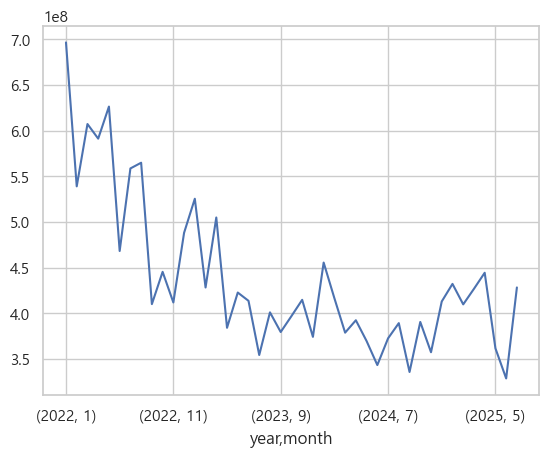

In [18]:
df.groupby(['year','month'])['value'].sum().plot(kind='line')

<Axes: xlabel='month'>

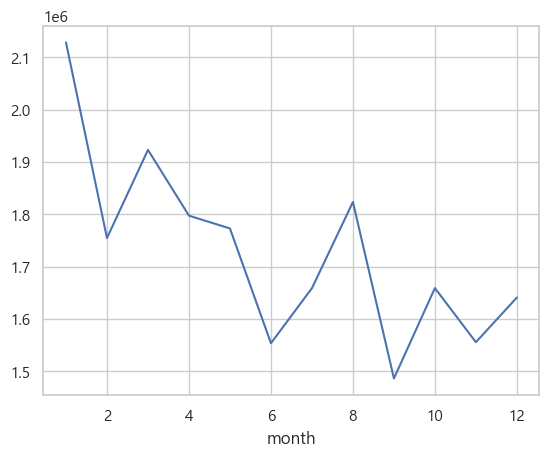

In [19]:
df.groupby('month')['value'].mean().plot(kind='line')

<Axes: xlabel='month', ylabel='value'>

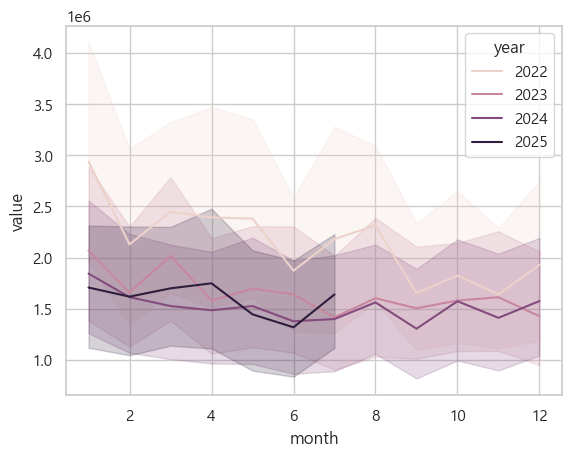

In [20]:
sns.lineplot(x='month', y='value', hue='year', data=df)

<Axes: xlabel='month', ylabel='hs4'>

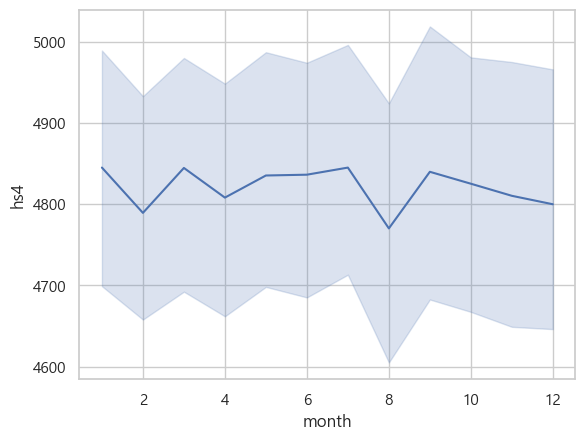

In [21]:
sns.lineplot(data=df, x='month', y='hs4')

### 3. 상관관계 및 단위 효율 분석

In [22]:
corr_df = df[['weight','quantity','value']].corr() # quantity 불필요해 보임
corr_df

,weight,quantity,value
weight,1.000000,-0.002299,0.670956
quantity,-0.002299,1.000000,-0.000050
value,0.670956,-0.000050,1.000000


<Axes: >

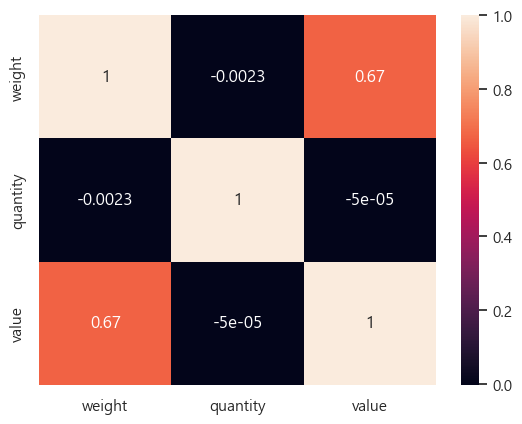

In [23]:
sns.heatmap(corr_df, annot=True)

<Axes: ylabel='count'>

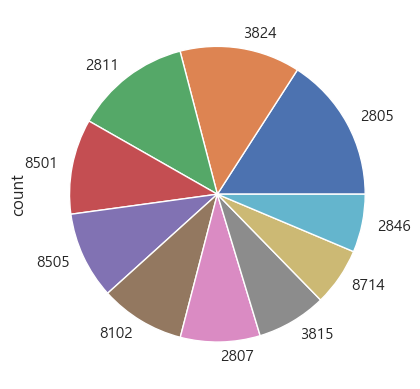

In [24]:
df['hs4'].value_counts().head(10).plot.pie() # 대분류로 다시 보기

In [25]:
df['unit_wq'] = df['weight'] / df['quantity']   # 무게 대비 수량 비율
df['unit_vw'] = df['value'] / df['weight']      # 무게 대비 무역량 (단가 개념)

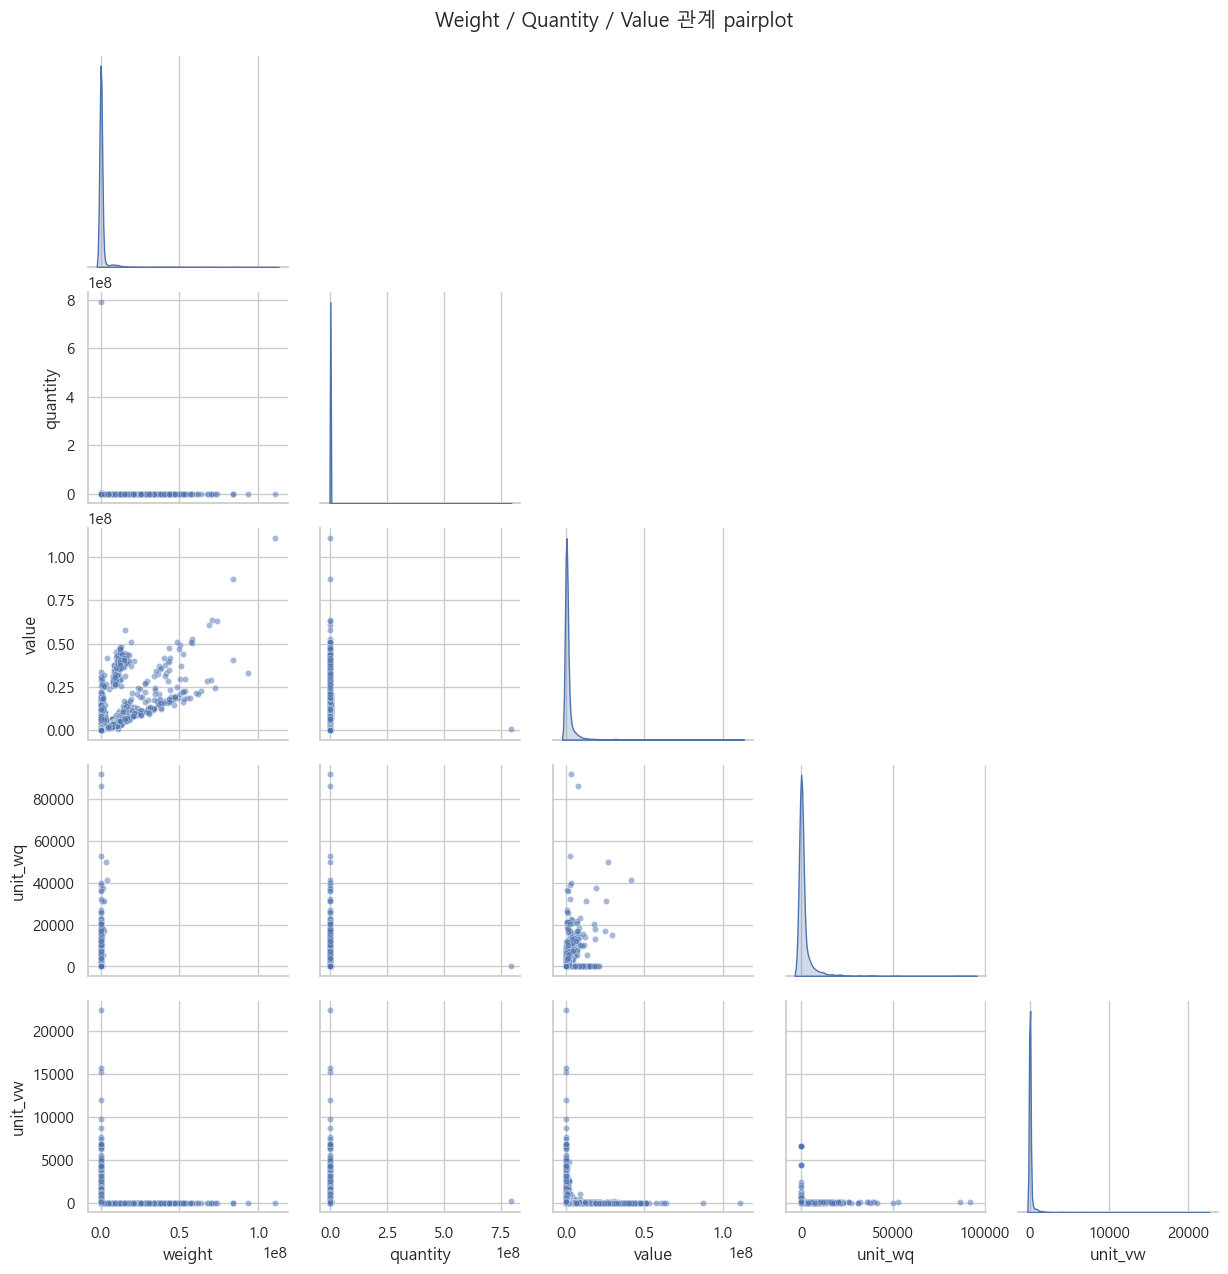

In [26]:
sns.pairplot(
    df[['weight', 'quantity', 'value', 'unit_wq', 'unit_vw']],
    diag_kind='kde',
    corner=True,
    plot_kws={'alpha': 0.5, 's': 20}
)
plt.suptitle("Weight / Quantity / Value 관계 pairplot", y=1.02)
plt.show() # logscale 고려

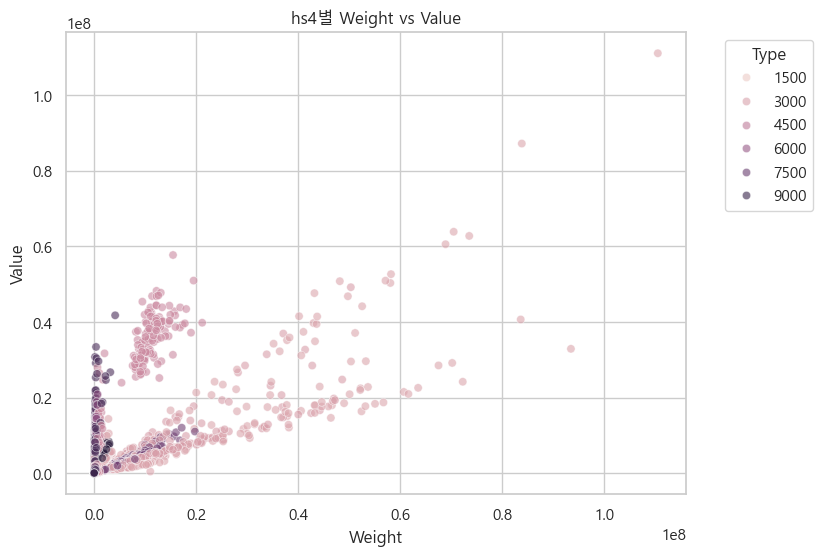

In [28]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='weight',
    y='value',
    hue='hs4',          # 또는 type
    alpha=0.6
)
plt.title('hs4별 Weight vs Value')
plt.xlabel('Weight')
plt.ylabel('Value')
plt.legend(title='Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


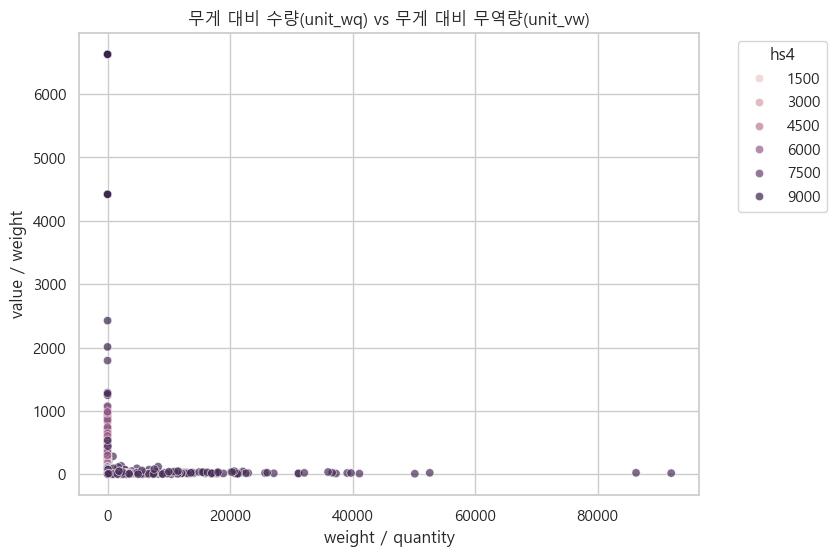

In [43]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='unit_wq',
    y='unit_vw',
    hue='hs4',
    alpha=0.7
)
plt.title('무게 대비 수량(unit_wq) vs 무게 대비 무역량(unit_vw)')
plt.xlabel('weight / quantity')
plt.ylabel('value / weight')
plt.legend(title='hs4', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show() # 9000대는 기타를 다 합쳐놓기 때문에 무게 대비 수량이 많음


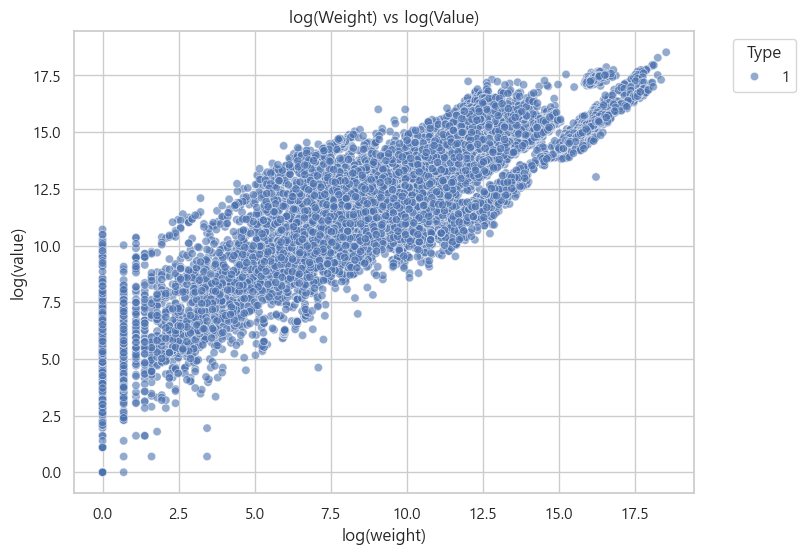

In [30]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x=np.log1p(df['weight']),
    y=np.log1p(df['value']),
    hue='type',
    alpha=0.6
)
plt.title('log(Weight) vs log(Value)')
plt.xlabel('log(weight)')
plt.ylabel('log(value)')
plt.legend(title='Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### 그 외 시각화

C:\Users\julia\AppData\Local\Temp\ipykernel_27044\2606663162.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


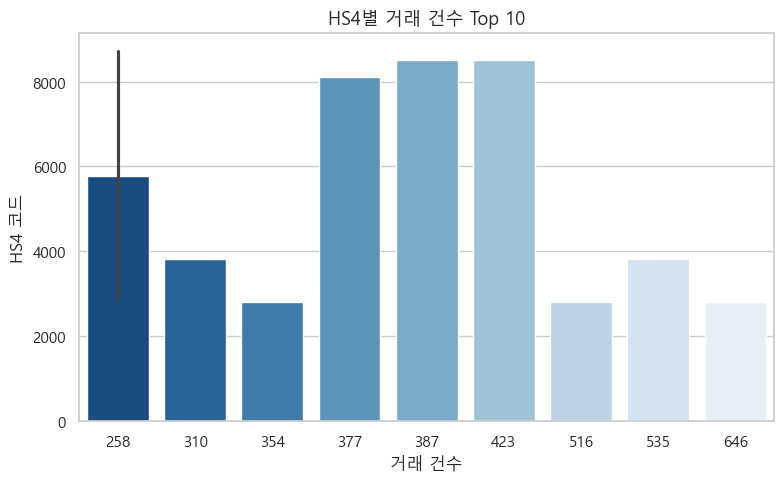

In [31]:
# HS4별 거래 건수 (상위 10개 시각화)
# --- 거래 건수 집계 ---
hs4_count = df['hs4'].value_counts().head(10).reset_index()
hs4_count.columns = ['hs4', 'count']

# --- 시각화 ---
plt.figure(figsize=(8,5))
sns.barplot(
    data=hs4_count,
    x='count',
    y='hs4',
    palette='Blues_r'
)
plt.title('HS4별 거래 건수 Top 10', fontsize=13)
plt.xlabel('거래 건수')
plt.ylabel('HS4 코드')
plt.tight_layout()
plt.show() # 선 확인, 대분류를 보고 확인, 대분류 안 소분류 확인

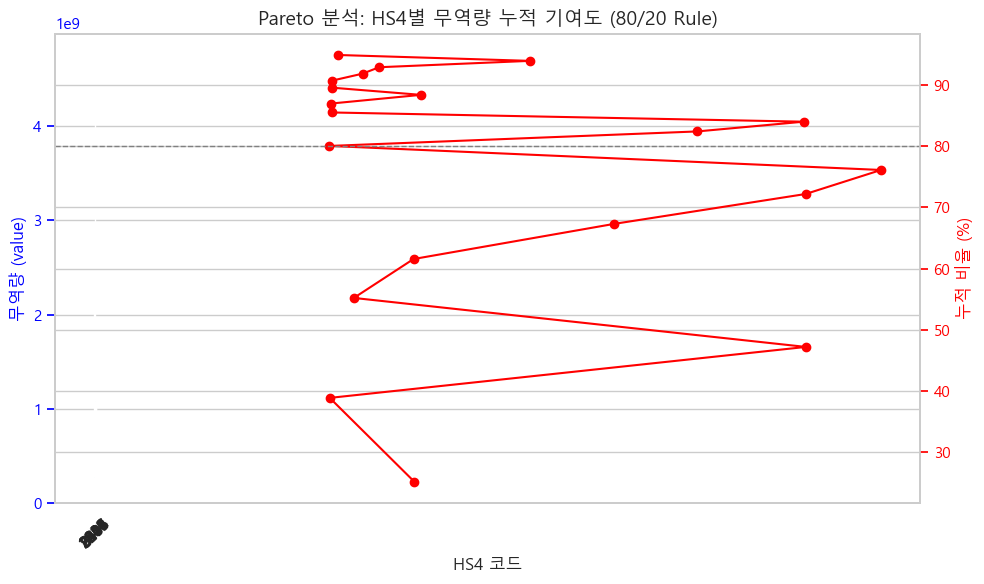

In [32]:
# HS4별 무역량 기여도 (Pareto 80/20 Rule Plot)
# --- HS4별 총 무역량(value) 계산 ---
hs4_value = df.groupby('hs4')['value'].sum().sort_values(ascending=False).reset_index()

# --- 누적 비율 계산 ---
hs4_value['cum_sum'] = hs4_value['value'].cumsum()
hs4_value['cum_perc'] = 100 * hs4_value['cum_sum'] / hs4_value['value'].sum()

# --- 시각화 ---
fig, ax1 = plt.subplots(figsize=(10,6))

# 막대: HS4별 무역량
sns.barplot(data=hs4_value.head(20), x='hs4', y='value', color='skyblue', ax=ax1)
ax1.set_xlabel('HS4 코드')
ax1.set_ylabel('무역량 (value)', color='blue')
ax1.tick_params('y', colors='blue')
plt.xticks(rotation=45)

# 라인: 누적 비율
ax2 = ax1.twinx()
ax2.plot(hs4_value['hs4'].head(20), hs4_value['cum_perc'].head(20), color='red', marker='o')
ax2.set_ylabel('누적 비율 (%)', color='red')
ax2.tick_params('y', colors='red')
ax2.axhline(80, color='gray', linestyle='--', linewidth=1)  # 80% 기준선

plt.title('Pareto 분석: HS4별 무역량 누적 기여도 (80/20 Rule)', fontsize=14)
plt.tight_layout()
plt.show()


In [33]:
# “80%를 차지하는 HS4 코드”만 추출하고 싶을 때
top_80 = hs4_value[hs4_value['cum_perc'] <= 80]
print(f"전체 무역량의 80%를 차지하는 HS4 코드 개수: {len(top_80)}개")
print(top_80.head()) # 대분류 나눠서 산업군 확인하기!!!! -> 소분류도 확인해보기
# 80%를 차지하는 산업군은 다른 산업군에도 영향을 미칠 것으로 사료됨.

전체 무역량의 80%를 차지하는 HS4 코드 개수: 8개
    hs4         value       cum_sum   cum_perc
0  3824  4.746594e+09  4.746594e+09  25.182748
1  2814  2.579887e+09  7.326481e+09  38.870171
2  8505  1.569531e+09  8.896012e+09  47.197216
3  3102  1.509013e+09  1.040502e+10  55.203187
4  3815  1.198069e+09  1.160309e+10  61.559463


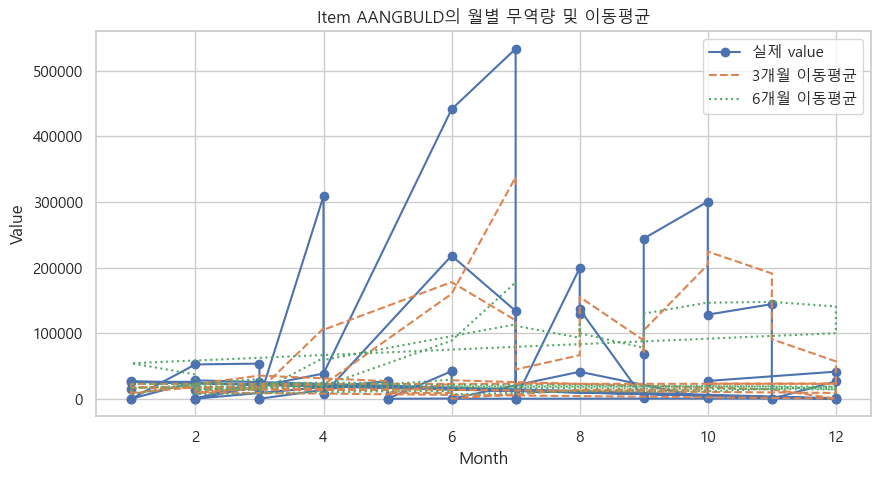

In [34]:
# --- 연월을 기준으로 정렬 ---
df = df.sort_values(['item_id', 'year', 'month'])

# --- 그룹별 rolling mean 계산 ---
# 무역량(value)의 3개월, 6개월 이동평균
df['value_rm3'] = df.groupby('item_id')['value'].transform(lambda x: x.rolling(window=3, min_periods=1).mean())
df['value_rm6'] = df.groupby('item_id')['value'].transform(lambda x: x.rolling(window=6, min_periods=1).mean())

# --- 시각화 (예시: 특정 item_id의 추세) ---
sample_item = df['item_id'].iloc[0]  # 임의 선택
sample_df = df[df['item_id'] == sample_item]

plt.figure(figsize=(10,5))
plt.plot(sample_df['month'], sample_df['value'], label='실제 value', marker='o')
plt.plot(sample_df['month'], sample_df['value_rm3'], label='3개월 이동평균', linestyle='--')
plt.plot(sample_df['month'], sample_df['value_rm6'], label='6개월 이동평균', linestyle=':') # 이동평균 3개월, 6개월 + 1년~
plt.title(f'Item {sample_item}의 월별 무역량 및 이동평균')
plt.xlabel('Month')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [35]:
# --- item별 평균 지표 계산 ---
item_stats = df.groupby('item_id').agg({
    'weight': 'mean',
    'quantity': 'mean',
    'value': 'mean'
}).reset_index()

item_stats.rename(columns={
    'weight': 'weight_per_item',
    'quantity': 'quantity_per_item',
    'value': 'value_per_item'
}, inplace=True)

# --- 상대적 효율 지표 ---
item_stats['value_per_kg'] = item_stats['value_per_item'] / item_stats['weight_per_item']  # 무게당 금액
item_stats['value_per_quantity'] = item_stats['value_per_item'] / item_stats['quantity_per_item']  # 수량당 금액

# --- 정렬 및 확인 ---
item_stats = item_stats.sort_values('value_per_kg', ascending=False)
print(item_stats.head())


     item_id  weight_per_item  quantity_per_item  value_per_item  \
30  GMBFCMIU         0.000000                0.0      565.000000   
38  JSLXRQOK         1.593750                0.0     6786.864583   
16  DJBLNPNC         0.426230                0.0     1398.245902   
89  WQMVCOEM        43.408696                0.0    54921.504348   
97  ZGJXVMNI       649.527132                0.0   752091.046512   

    value_per_kg  value_per_quantity  
30           inf                 inf  
38   4258.424837                 inf  
16   3280.500000                 inf  
89   1265.218950                 inf  
97   1157.905513                 inf  


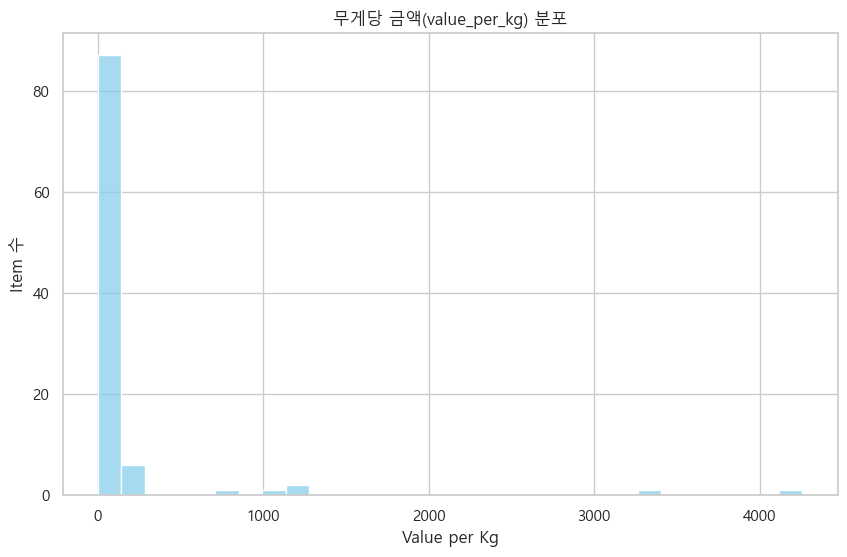

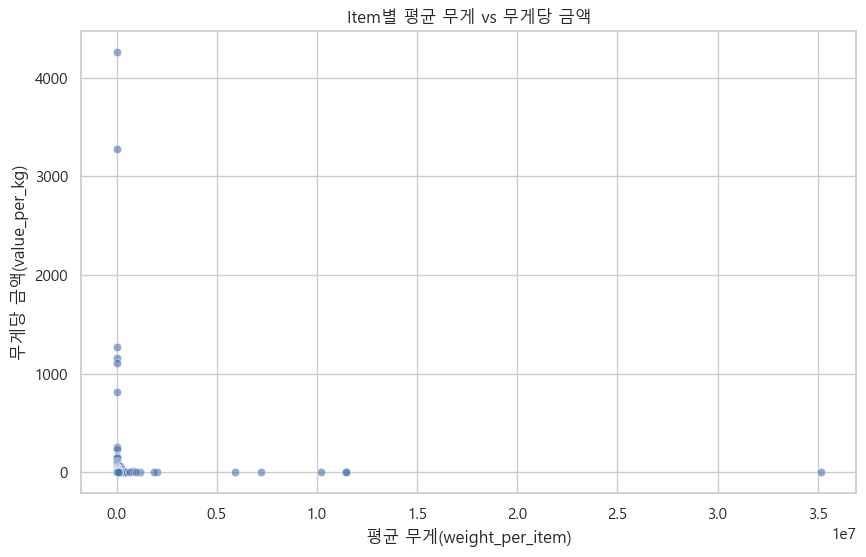

In [36]:
plt.figure(figsize=(10,6))
sns.histplot(item_stats['value_per_kg'], bins=30, color='skyblue')
plt.title('무게당 금액(value_per_kg) 분포')
plt.xlabel('Value per Kg')
plt.ylabel('Item 수')
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=item_stats,
    x='weight_per_item',
    y='value_per_kg',
    alpha=0.6
)
plt.title('Item별 평균 무게 vs 무게당 금액')
plt.xlabel('평균 무게(weight_per_item)')
plt.ylabel('무게당 금액(value_per_kg)')
plt.show()


In [37]:
# 전체 item별 구조지표
trade_summary = item_stats[['item_id', 'weight_per_item', 'quantity_per_item', 'value_per_kg', 'value_per_quantity']]

# 효율 상위/하위 아이템 확인
top_items = trade_summary.sort_values('value_per_kg', ascending=False).head(10)
bottom_items = trade_summary.sort_values('value_per_kg', ascending=True).head(10)

print("💎 고부가가치 Top 10")
print(top_items)
print("\n📦 저부가가치 Bottom 10")
print(bottom_items) # hs4 추가해서 어떤건지 확인해보기


💎 고부가가치 Top 10
     item_id  weight_per_item  quantity_per_item  value_per_kg  \
30  GMBFCMIU         0.000000           0.000000           inf   
38  JSLXRQOK         1.593750           0.000000   4258.424837   
16  DJBLNPNC         0.426230           0.000000   3280.500000   
89  WQMVCOEM        43.408696           0.000000   1265.218950   
97  ZGJXVMNI       649.527132           0.000000   1157.905513   
75  SUOYXCHP        15.105263           0.000000   1110.344948   
6   BEZYMBBT      2018.472868           0.000000    815.694669   
8   BLANHGYY        33.125000           2.046875    255.325000   
81  UXSPKBJR      1029.007752           0.000000    231.188983   
51  NAQIHUKZ        20.322034           0.000000    168.897415   

    value_per_quantity  
30                 inf  
38                 inf  
16                 inf  
89                 inf  
97                 inf  
75                 inf  
6                  inf  
8          4131.977099  
81                 inf  
51      

C:\Users\julia\AppData\Local\Temp\ipykernel_27044\266618489.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hs4_eff.sort_values('value_per_kg', ascending=False).head(10),


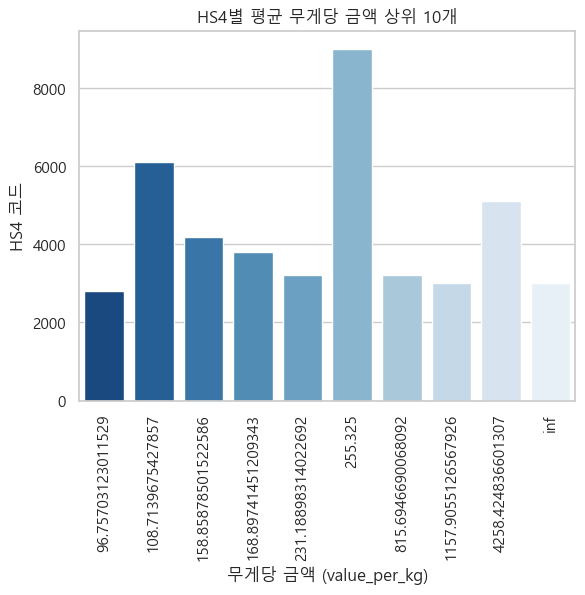

In [42]:
hs4_eff = df.groupby('hs4').agg({
    'weight': 'mean',
    'quantity': 'mean',
    'value': 'mean'
}).reset_index()

hs4_eff['value_per_kg'] = hs4_eff['value'] / hs4_eff['weight']

sns.barplot(data=hs4_eff.sort_values('value_per_kg', ascending=False).head(10),
            x='value_per_kg', y='hs4', palette='Blues_r')
plt.title('HS4별 평균 무게당 금액 상위 10개')
plt.xlabel('무게당 금액 (value_per_kg)')
plt.xticks(rotation=90)
plt.ylabel('HS4 코드')
plt.show()
